In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_theme('notebook')
import matplotlib as mpl
import progressbar
import pickle
from scipy.signal import find_peaks, peak_prominences, peak_widths
from datetime import datetime
import warnings

warnings.simplefilter('ignore')
%run -i helper_functions.py

In [2]:
data_dir = os.getcwd() + '/Full_Data/'
data = []
row_num = 0
col_num = 8

get_datafiles(data_dir, data, row_num, col_num)

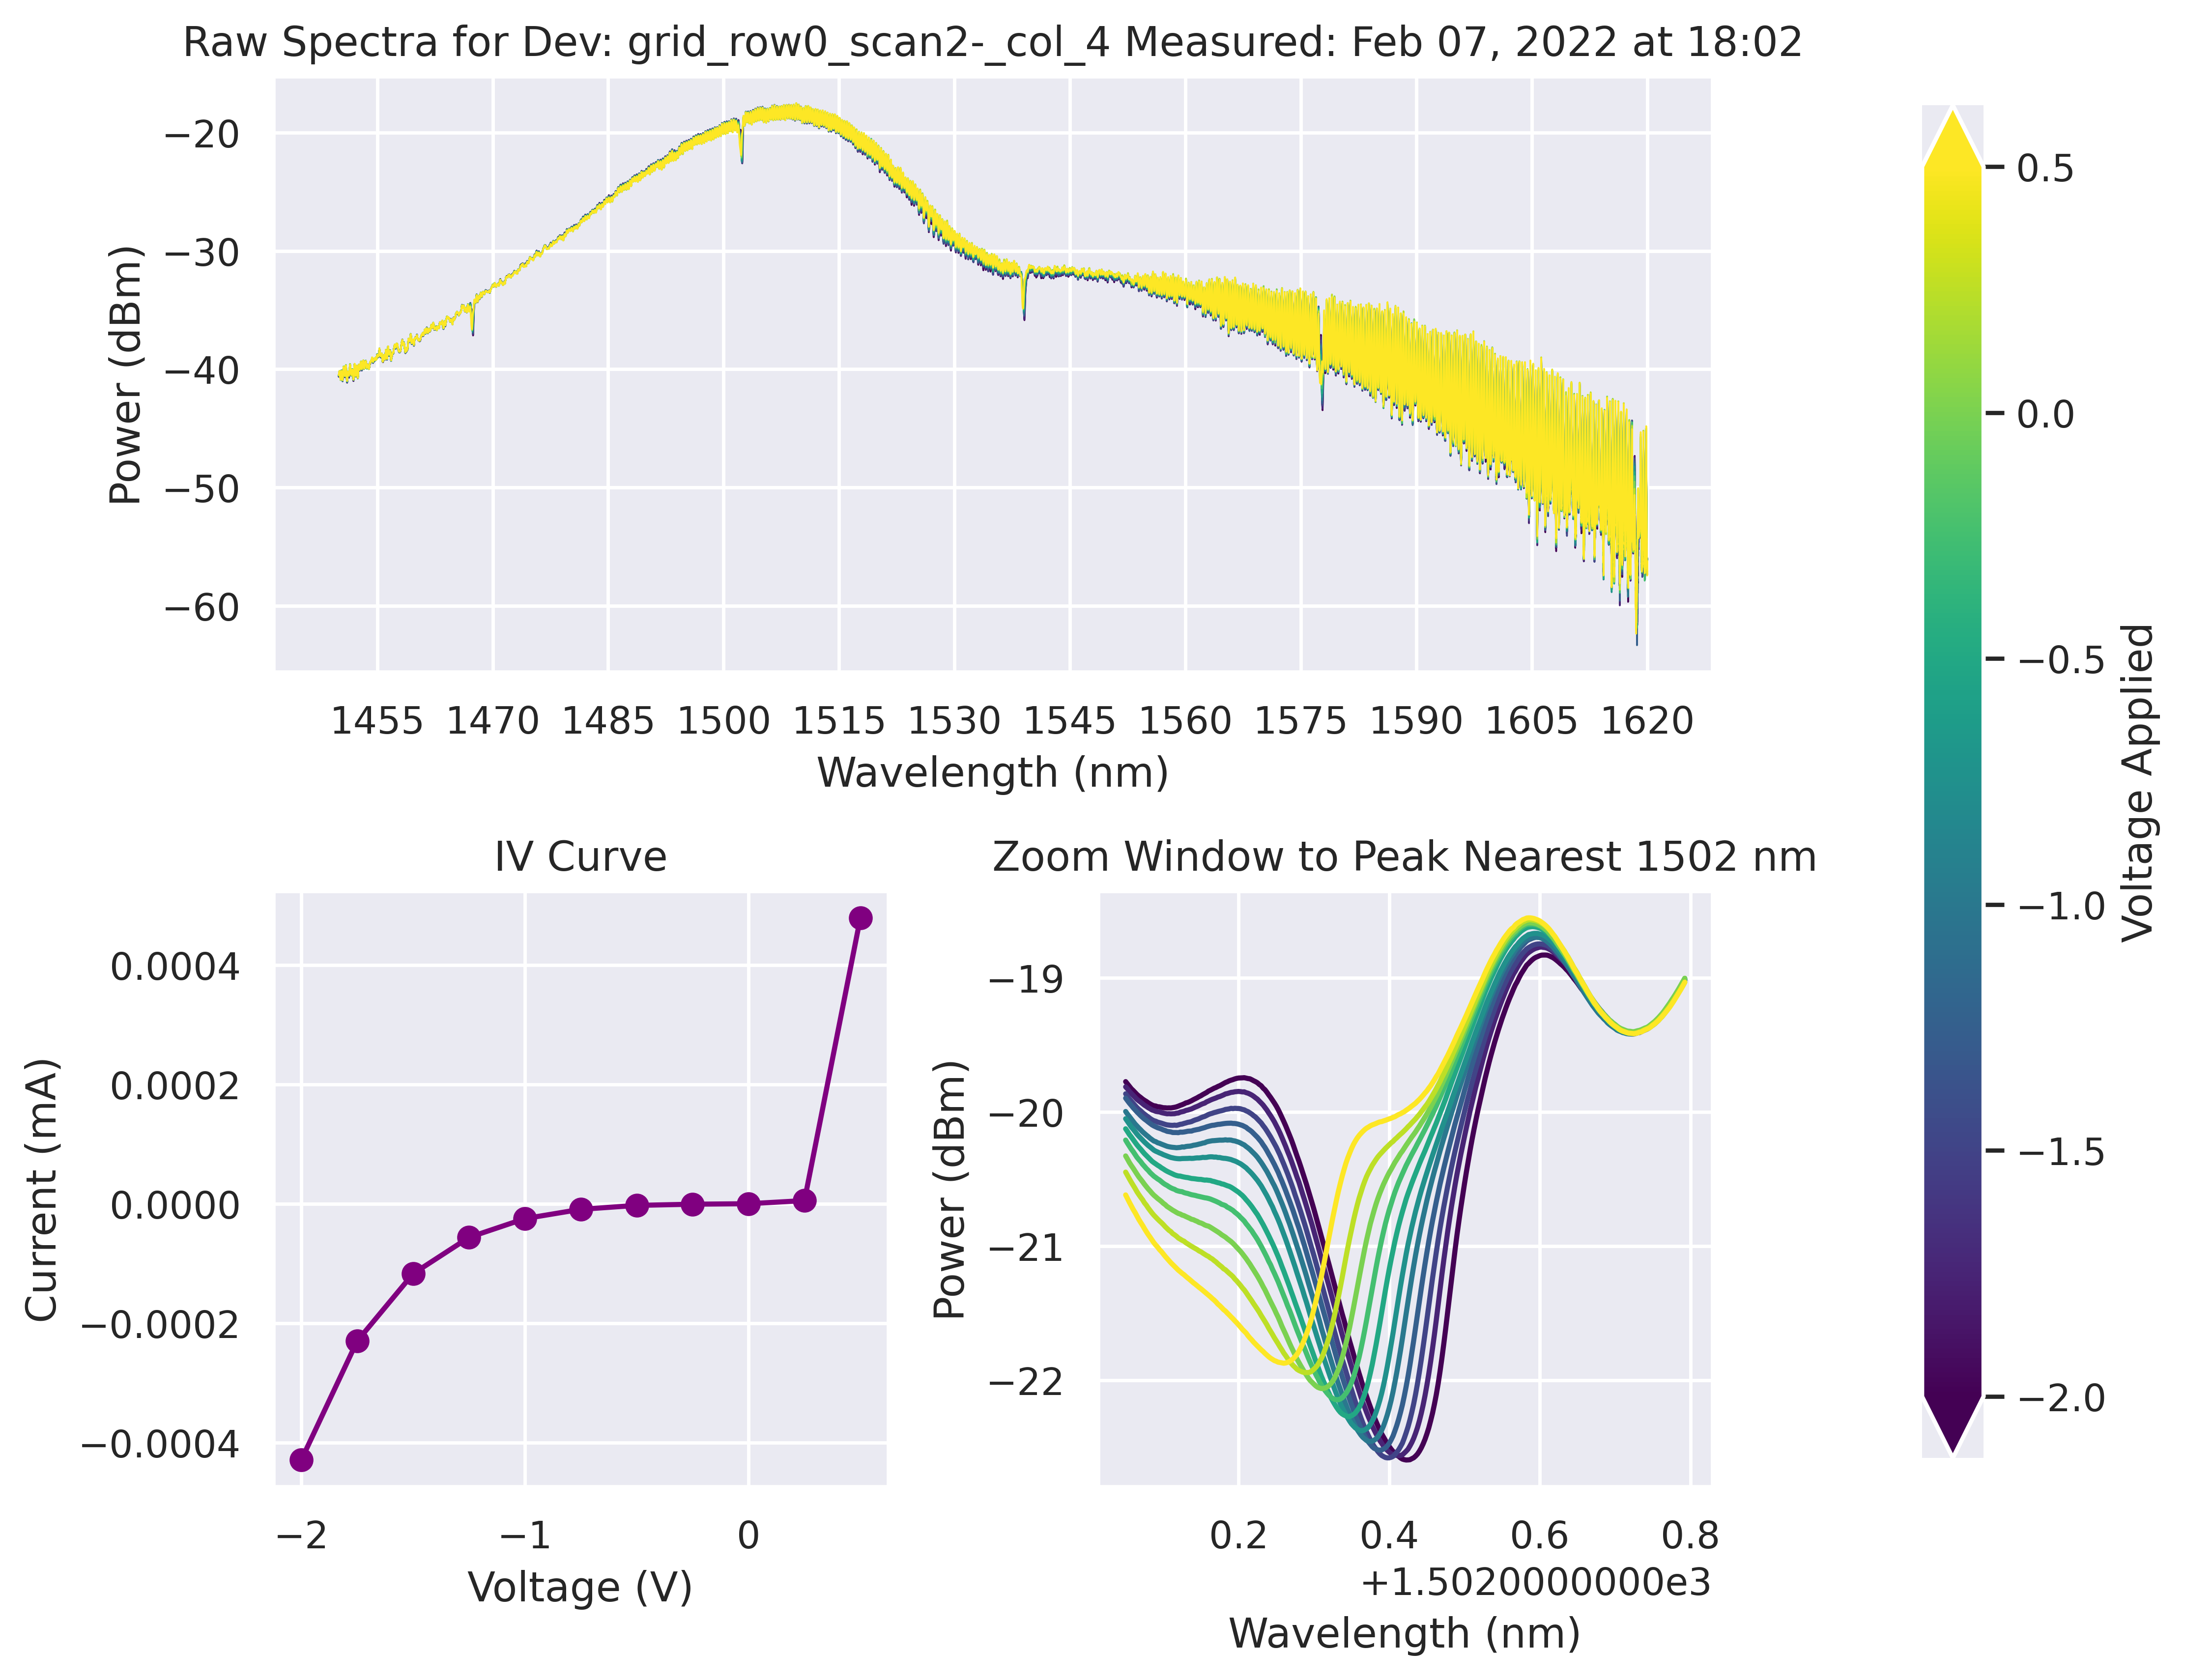

In [12]:
plot_VW(data[8], fit_order=8, prominence=1, fsr=15, ideal_peak_wl = 1502, zoom_span=0.75)

In [4]:
peak = []
res = []

# extract peak 1
peak.append(extract_peaks(data[0], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))
peak.append(extract_peaks(data[1], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))
peak.append(extract_peaks(data[2], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))
peak.append(extract_peaks(data[3], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))
peak.append(extract_peaks(data[4], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))
peak.append(extract_peaks(data[5], prominence=1, zoom_span=0.75, ideal_peak_wl=1465))

# extract peak 2
peak.append(extract_peaks(data[0], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))
peak.append(extract_peaks(data[1], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))
peak.append(extract_peaks(data[2], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))
peak.append(extract_peaks(data[3], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))
peak.append(extract_peaks(data[4], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))
peak.append(extract_peaks(data[5], prominence=1, zoom_span=0.75, ideal_peak_wl=1500))

# extract peak 3
peak.append(extract_peaks(data[0], prominence=1, zoom_span=0.5, ideal_peak_wl=1540))
peak.append(extract_peaks(data[1], prominence=1, zoom_span=0.5, ideal_peak_wl=1540))
peak.append(extract_peaks(data[2], prominence=1, zoom_span=0.5, ideal_peak_wl=1540))
peak.append(extract_peaks(data[3], prominence=1, zoom_span=0.6, ideal_peak_wl=1539))
peak.append(extract_peaks(data[4], prominence=1, zoom_span=0.5, ideal_peak_wl=1540))
peak.append(extract_peaks(data[5], prominence=1, zoom_span=0.5, ideal_peak_wl=1540))

# extract peak 4
peak.append(extract_peaks(data[0], zoom_span=0.3, ideal_peak_wl=1580))
peak.append(extract_peaks(data[1], zoom_span=0.3, ideal_peak_wl=1580))
peak.append(extract_peaks(data[2], zoom_span=0.3, ideal_peak_wl=1580))
peak.append(extract_peaks(data[3], zoom_span=0.3, ideal_peak_wl=1580))
peak.append(extract_peaks(data[4], zoom_span=0.3, ideal_peak_wl=1580))
peak.append(extract_peaks(data[5], zoom_span=0.3, ideal_peak_wl=1580))

peak = np.array(peak)

# determine average resonances and scale to 0
for i in range(0, len(peak), 6):
    resonances = []
    for j in range(6):
        if (peak[i+j,0][0] != 0):
            resonances.append([peak[i+j,0]])
    res.append( int( np.nan_to_num( np.average(resonances) ) ) )

for i in range(len(peak)):
    peak[i,0] = peak[i,0] - min(peak[i,0])

# test stuff

In [14]:
peak0 = []
res0 = []

peak0.append(extract_peaks(data[6], ideal_peak_wl=1465))
peak0.append(extract_peaks(data[7], ideal_peak_wl=1465))
peak0.append(extract_peaks(data[8], prominence=1, fsr=7, ideal_peak_wl=1467))

peak0.append(extract_peaks(data[6], ideal_peak_wl=1500))
peak0.append(extract_peaks(data[7], ideal_peak_wl=1500))
peak0.append(extract_peaks(data[8], prominence=1, fsr=7, ideal_peak_wl=1502))

peak0.append(extract_peaks(data[6], zoom_span=0.5, ideal_peak_wl=1540))
peak0.append(extract_peaks(data[7], zoom_span=0.5, ideal_peak_wl=1540))
peak0.append(extract_peaks(data[8], zoom_span=0.5, ideal_peak_wl=1540))

peak0.append(extract_peaks(data[6], zoom_span=0.3, ideal_peak_wl=1580))
peak0.append(extract_peaks(data[7], zoom_span=0.3, ideal_peak_wl=1580))
peak0.append(extract_peaks(data[8], fsr=2, zoom_span=0.3, ideal_peak_wl=1577))

peak0 = np.array(peak0)

# determine average resonances and scale to 0
for i in range(0, len(peak0), 1):
    resonances = []
    for j in range(1):
        if (peak0[i+j,0][0] != 0):
            resonances.append([peak0[i+j,0]])
    res0.append( int( np.nan_to_num( np.average(resonances) ) ) )

for i in range(len(peak0)):
    peak0[i,0] = peak0[i,0] - min(peak0[i,0])

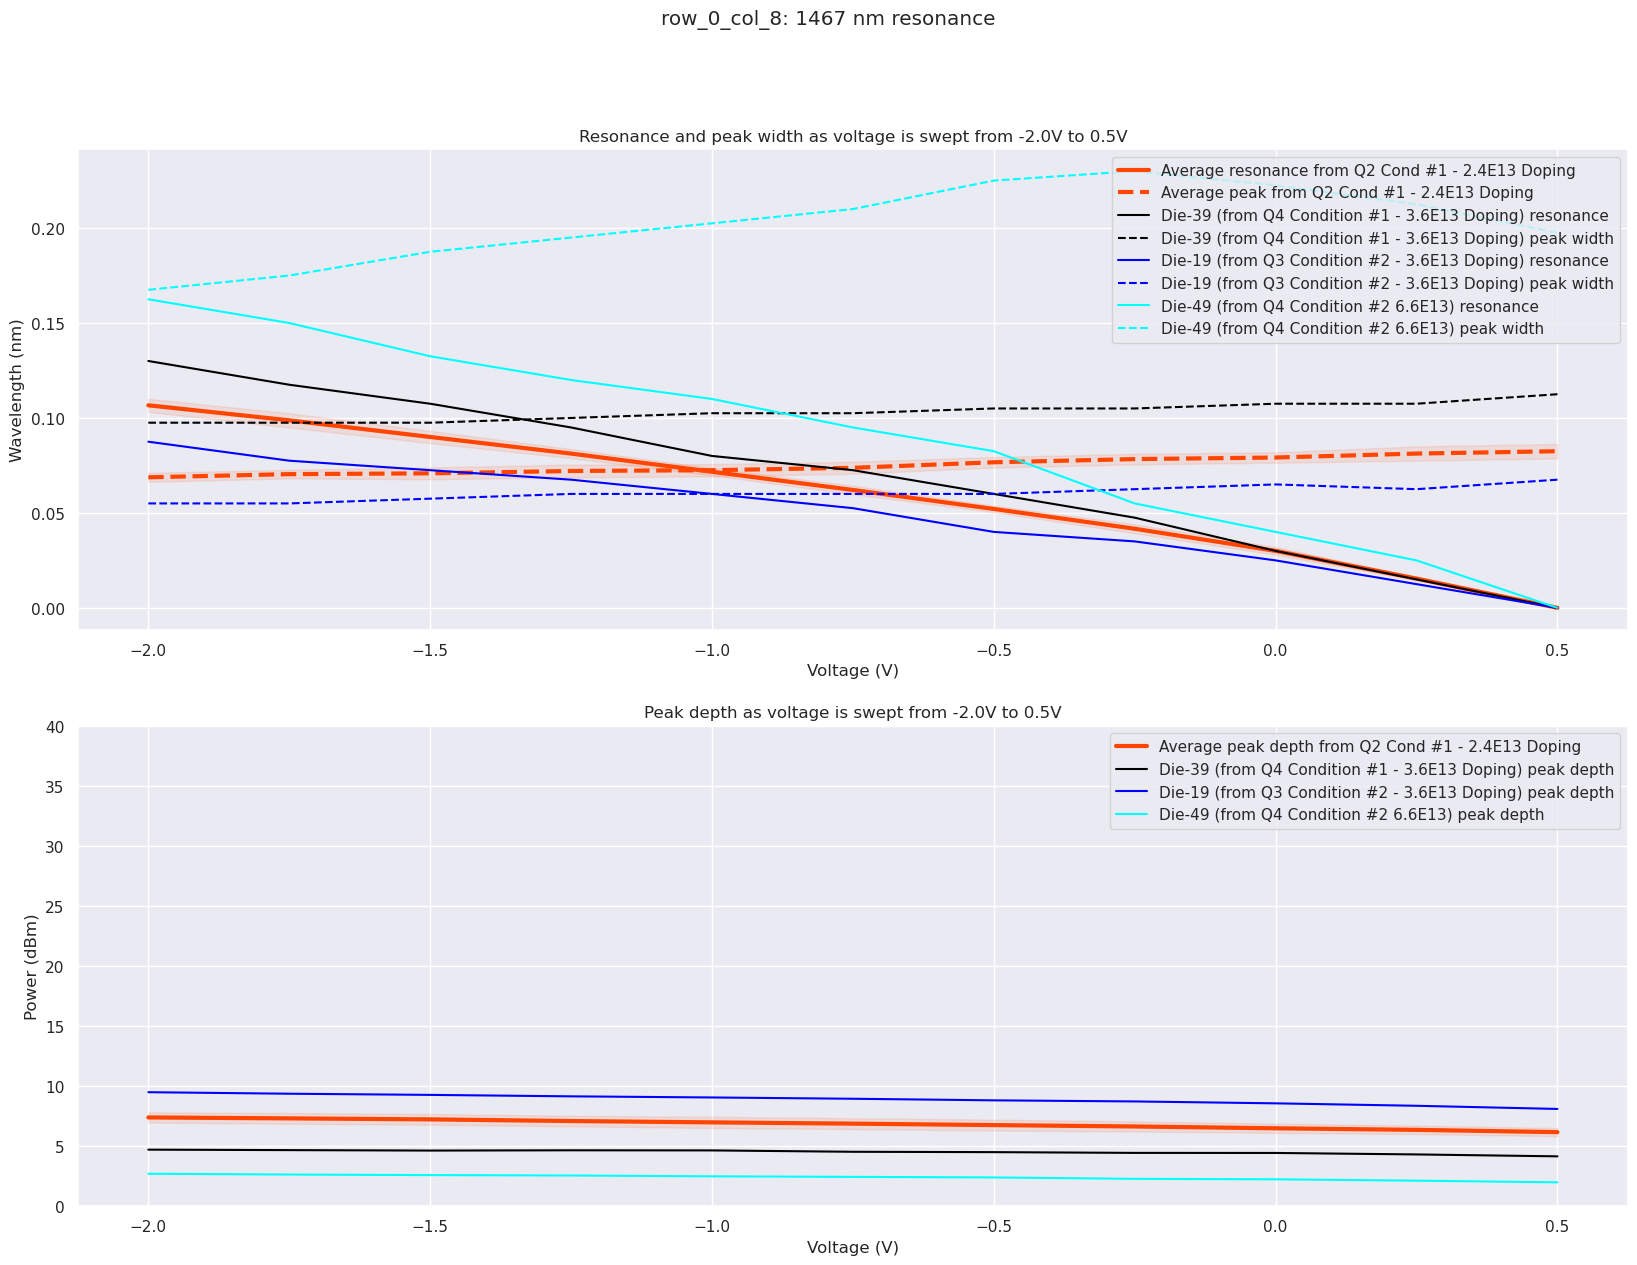

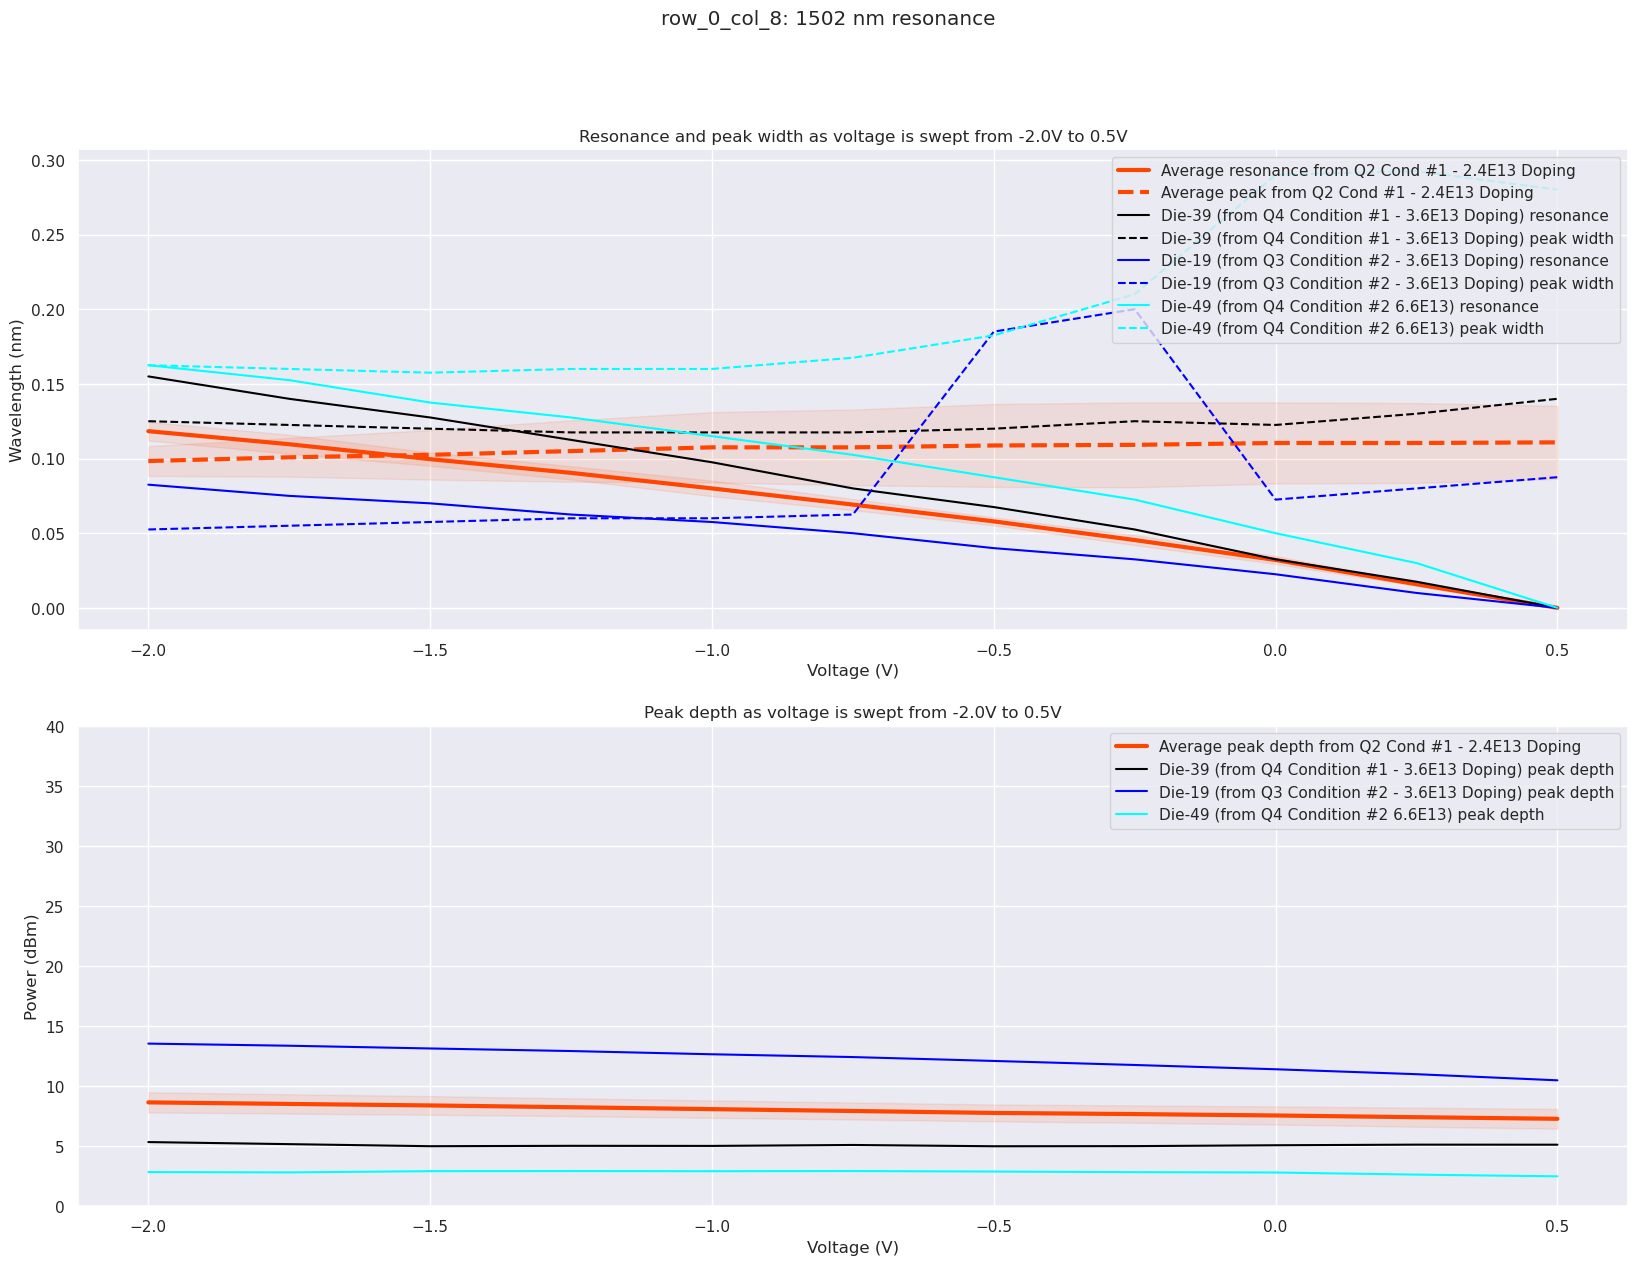

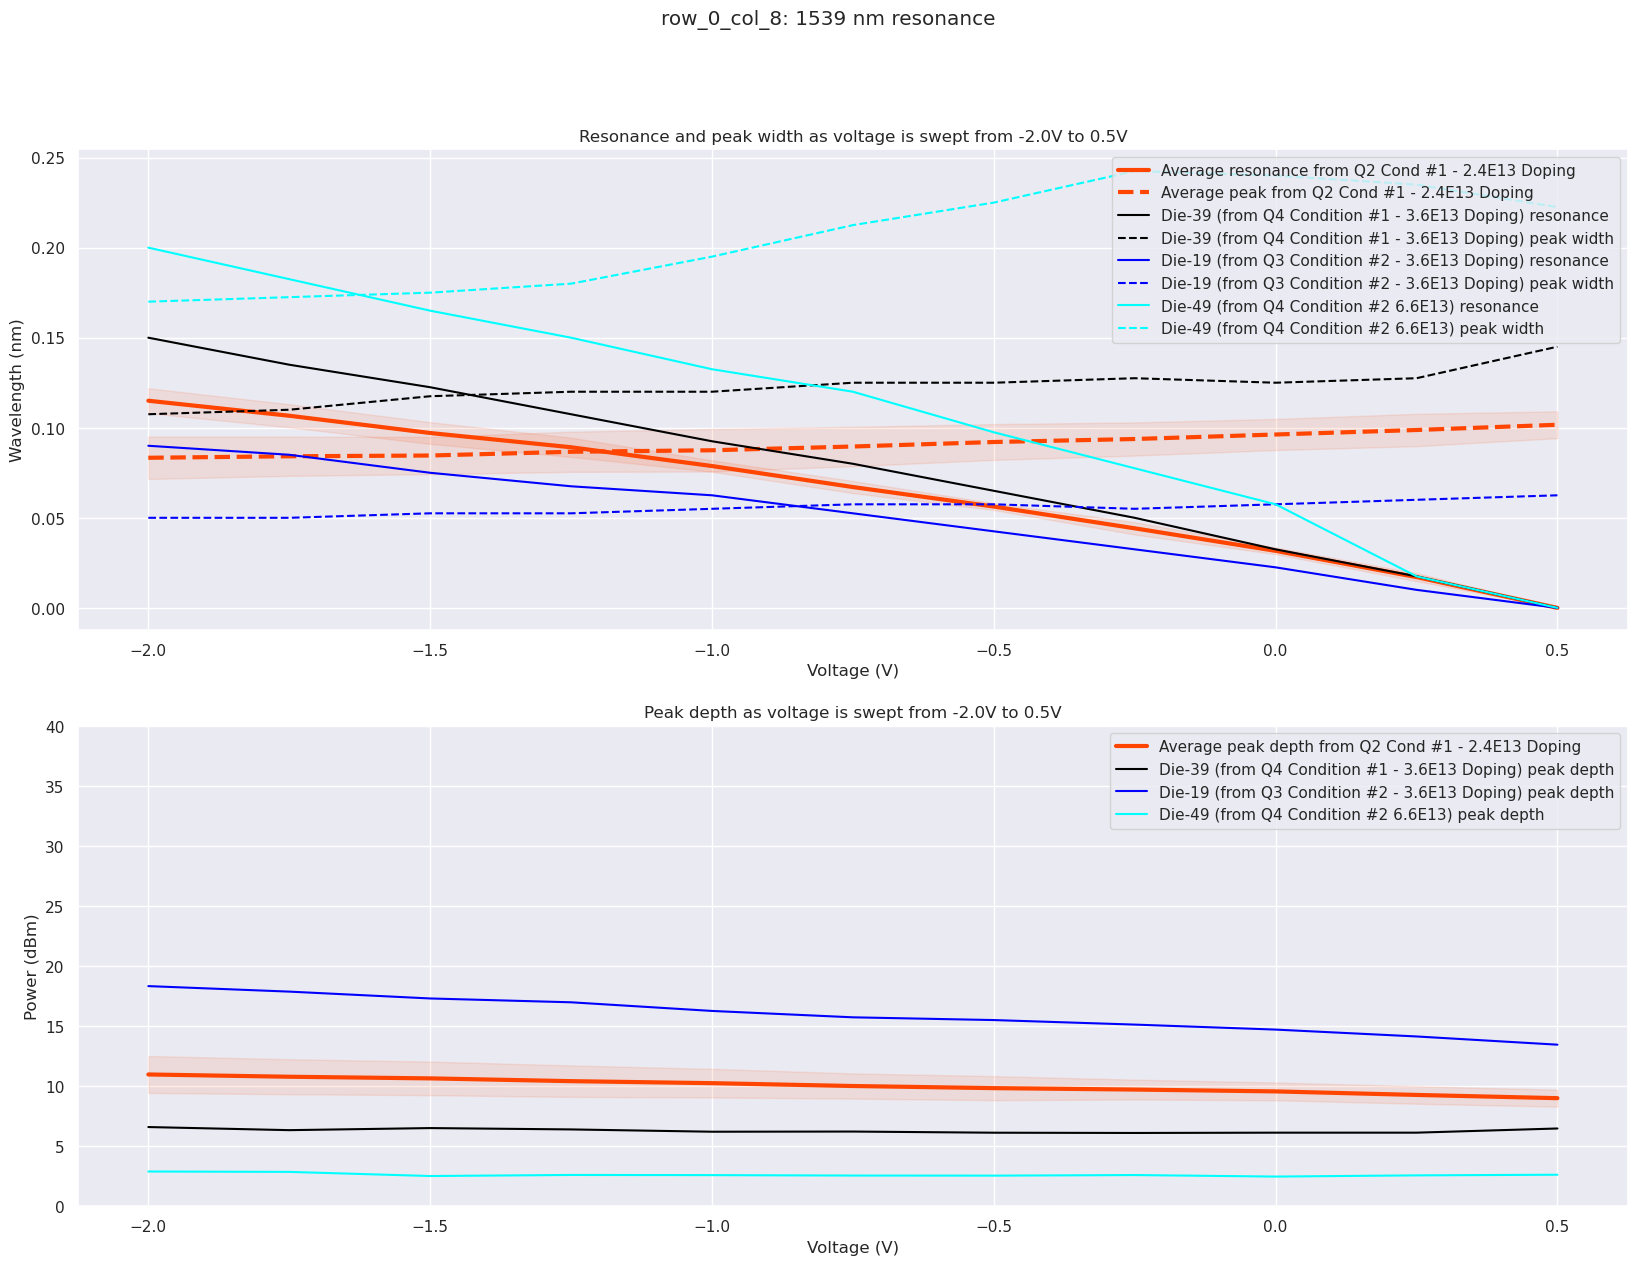

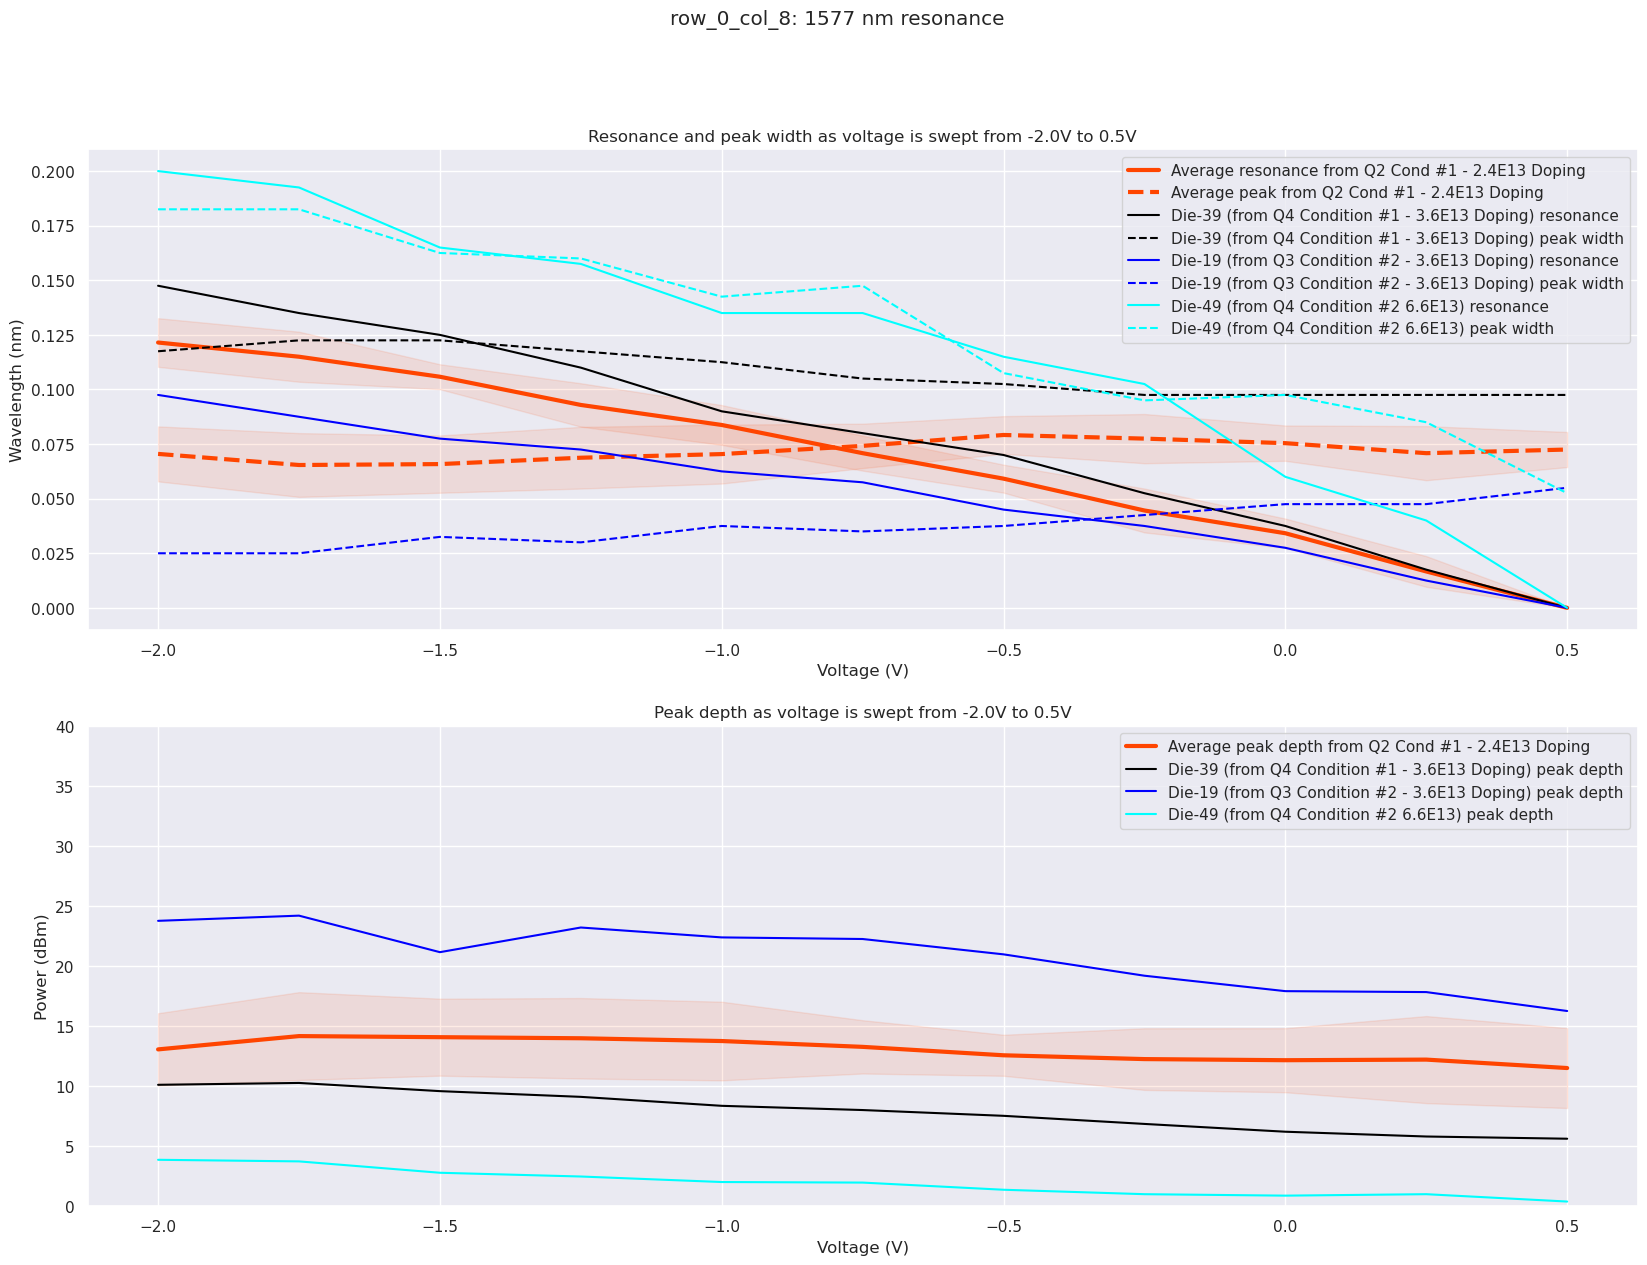

In [15]:
plot_res(data, peak, res, row_num, col_num, peak0=peak0)

In [7]:
# plot_resonances(data, peak, res, row_num, col_num)

In [8]:
# plot_average_resonances(data, peak, res, row_num, col_num)